In [2]:
import pandas as pd
from pprint import pprint
from utils.imgShow import imgShow, imsShow
import matplotlib.pyplot as plt
from utils.metric_process import csv_merge, smooth


In [3]:
path_metric_deeplabv3plus = 'model_trained/deeplabv3plus_trained_metrics.csv'
path_metric_deeplabv3plus_mobilev2 = 'model_trained/deeplabv3plus_mobilev2_trained_metrics.csv'
metric_deeplabv3plus = pd.read_csv(path_metric_deeplabv3plus)
metric_deeplabv3plus_mobilev2 = pd.read_csv(path_metric_deeplabv3plus_mobilev2)
print(metric_deeplabv3plus.tail(2))


     tra_loss    tra_oa  tra_miou  val_loss    val_oa  val_miou
198  0.180469  0.794996  0.634228  0.356551  0.880968  0.556196
199  0.179431  0.801875  0.653017  0.356421  0.879869  0.551866


In [23]:
metric_deeplabv3plus_smooth_x, metric_deeplabv3plus_smooth_y = smooth(metric_deeplabv3plus['val_oa'].to_numpy(), num_sam=20)
metric_deeplabv3plus_mobilev2_smooth_x, metric_deeplabv3plus_mobilev2_smooth_y = smooth(metric_deeplabv3plus_mobilev2['val_oa'].to_numpy(), num_sam=20)


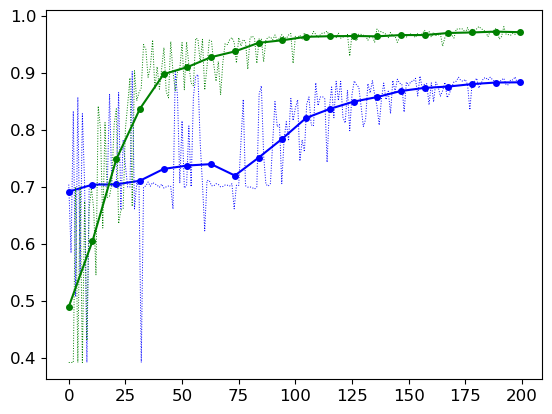

In [24]:
plt.rcParams.update({'font.size': 12})
color = ['blue', 'green', 'red']
plt.plot(metric_deeplabv3plus['val_oa'], color=color[0], linestyle='dotted', linewidth = 0.7)
plt.plot(metric_deeplabv3plus_smooth_x, metric_deeplabv3plus_smooth_y, color=color[0], \
            marker='o', markerfacecolor=color[0], markersize=4, linewidth=1.5, label= 'deeplabv3plus')
plt.plot(metric_deeplabv3plus_mobilev2['val_oa'], color=color[1], linestyle='dotted', linewidth = 0.7)
plt.plot(metric_deeplabv3plus_mobilev2_smooth_x, metric_deeplabv3plus_mobilev2_smooth_y, color=color[1], \
                    marker='o', markerfacecolor = color[1], markersize=4, linewidth = 1.5,label= 'deeplabv3plus_mobilev2')

